# Capstone First Rough Draft (Really Rough) 

## Introduction

Alzheimer’s disease (AD) is a multifactorial, polygenic neurodegenerative disorder characterized by the progressive deterioration of cognitive functions and a subsequent decline in the ability to perform activities of daily living independently [1]. As one of the most prevalent types of dementia, AD accounts for at least 60-80% of all diagnosed dementia cases, posing a significant public health challenge worldwide, especially as the global population ages [2, 3]. In the United States alone, approximately 5.3 million individuals are currently living with AD, with prevalence rates rising sharply among those aged 85 years and older [2]. 

Managing AD often involves polypharmacy due to the frequent occurrence of neuropsychiatric symptoms like depression, anxiety, and psychosis. Psychotropic medications—antidepressants, anxiolytics, and antipsychotics—are widely used alongside anti-dementia medicines, increasing the risk of complex drug–drug and gene–drug interactions. This capstone project specifically investigates the gene–drug interactions associated with psychotropic and anti-dementia medications in AD, utilizing pharmacogenomic databases to understand their pharmacokinetic and pharmacodynamic implications. The ultimate goal is to identify predictive biomarkers to guide personalized therapeutic strategies in AD patients.

***1.1 Etiology and Neuropathology***

The pathogenesis of AD is highly complex, arising from the dynamic interplay between genetic predispositions, environmental exposures, and cerebrovascular factors [4,5]. Early-onset AD, typically familial and less common, is frequently linked to APP, PSEN1, and PSEN2 gene mutations [6, 7]. In contrast, late-onset AD constitutes over 95% of cases and involves multiple genetic loci identified through genome-wide association studies (GWAS), underscoring the significance of gene heterogeneity in disease manifestation [7].

Neuropathologically, hallmarks of AD include extracellular accumulation of amyloid-beta (Aβ) plaques and intracellular neurofibrillary tangles composed of hyperphosphorylated tau protein[1]. These pathologies, coupled with neuroinflammation, mitochondrial dysfunction, oxidative stress, and impaired clearance mechanisms, lead to synaptic loss and neuronal degeneration, predominantly affecting cognitive-critical brain regions such as the neocortex and limbic structures [5].

***1.2 Treatment Strategies and the Role of Psychotropic Medications***

On average, individuals with Alzheimer’s Disease require between six and twelve medications daily to manage symptoms such as memory loss, behavioral disturbances, and functional decline, posing a significant public health and economic burden [8]. Cholinesterase inhibitors (donepezil, galantamine, rivastigmine) and NMDA receptor antagonists (memantine) remain the main symptomatic treatments but provide only modest relief [9]. Furthermore, substantial inter-individual variability exists in therapeutic response and side-effect profiles, highlighting the importance of personalized medicine [10].

Psychotropic medications, including antidepressants (selective serotonin reuptake inhibitors—SSRIs; serotonin-norepinephrine reuptake inhibitors—SNRIs; norepinephrine reuptake inhibitors—NRIs), antipsychotics (e.g., risperidone, aripiprazole), and anxiolytics (primarily benzodiazepines), are frequently prescribed to manage common AD-associated neuropsychiatric symptoms [2, 11, 12]. These medications differ significantly in efficacy and tolerability among patients due to genetic variability affecting drug metabolism and receptor interactions. While some agents like SSRIs offer relatively favorable safety profiles, others, particularly atypical antipsychotics, carry significant risks, including increased mortality, cardiovascular complications, and cognitive impairment [2, 11, 12].

***1.3 Pharmacogenomic Resources***

This project integrates two major pharmacogenomic resources—PharmGKB and the Drug–Gene Interaction Database (DGIdb)—to systematically explore and identify clinically relevant gene–drug interactions. PharmGKB is a comprehensive knowledgebase that collects, curates, and disseminates information on how human genetic variation impacts drug efficacy and safety [13,14]. This resource supports pharmacogenomic research by annotating genetic variants and their relationships to drugs and diseases through an extensive literature review, summarizing key pharmacogenes and drug–variant associations, and mapping drug-related pathways. Through collaborations with international consortia and clinical implementation projects, PharmGKB translates genomic knowledge into actionable insights for precision medicine [14]. Complementing this, DGIdb aggregates information on drugs, genes, and their interactions into a single, computable resource, to make the druggable genome accessible to researchers analyzing genome-wide datasets [15]. By identifying known or inferred interactions between drugs and gene products, DGIdb enables novel insights into therapeutic potential that may not be readily apparent. It accomplishes this by importing drug and gene claims from a variety of sources, employing rigorous normalization methods to harmonize data, and mapping interactions to unified therapeutic and genomic concepts [15]. Together, these tools provide a powerful platform for identifying actionable pharmacogenomic relationships that can inform personalized treatment strategies in Alzheimer's and beyond.

***1.4 Aim and Expected Impact***

This study combines bioinformatics with statistical analyses of pharmacogenomic data to identify the genetic factors influencing the efficacy and safety of psychotropic and anti-dementia treatments. Specifically, differential gene expression analysis will be performed using the limma method, and a graph network will be created to visualize the interactions among key genes. The findings from this research could significantly enhance personalized treatment strategies, ultimately leading to better clinical outcomes, fewer adverse reactions, and an improved quality of life for individuals with Alzheimer’s disease.


## Method

This study employed a multi-stage computational pipeline to investigate gene expression changes in Alzheimer’s disease and their pharmacogenomic implications concerning psychotropic drug response. Microarray data from GSE28146 were processed using limma for differential expression analysis, followed by gene ID mapping and KEGG enrichment. Following that, significant genes were cross-referenced with PharmGKB and DGIdb to identify interactions with psychotropic drug classes. Finally, gene-drug interactions were merged and visualized using NetworkX, incorporating interaction scores and confidence. Final analyses focused on validation and clinical interpretation of the pharmacogenomic relevance in Alzheimer’s.

### Differential Gene Expression Analysis

The first step in this study was to gain insight into the transcriptional activity in the CA1 hippocampus tissue gray matter obtained from individuals with varying degrees of Alzheimer’s Disease. The Blalock Lab at the University of Kentucky conducted an array of expression profiles on eight control subjects and twenty-two subjects with three varying degrees of Alzheimer’s symptoms – incipient, moderate, and severe [16]. These 30 subjects had their transcriptional profiles generated using the Affymetrix Human Genome U133 Plus 2.0 Array. 

To analyze this high-throughput data, the R statistical environment was utilized in conjunction with Bioconductor, an open-source project that provides a comprehensive suite of R packages specifically designed for bioinformatics and genomic data analysis, as illustrated in Code 1. Several core Bioconductor packages were utilized to facilitate the analysis. The affy package was used for importing and preprocessing the raw Affymetrix CEL files [17], while the Biobase package provided structured data containers (ExpressionSet objects) to ensure that both expression values and sample metadata were coherently managed [18]. The limma package performs normalization and statistical modeling [19]. 

Since microarray data are represented as raw intensity values, they require background correction and normalization before comparing. These preprocessing steps adjust for technical inconsistencies across samples and ensure that observed differences reflect underlying biology rather than platform noise [19]. Normalization was performed using the Robust Multi-array Average (RMA) method to reduce background noise and ensure consistency in expression levels across all samples.

The dataset (GSE28146) was retrieved from the NCBI Gene Expression Omnibus (GEO) [20], and the working directory was set to the appropriate local folder containing the raw CEL files. After data import, a metadata frame, sample_info, was constructed to record sample identifiers and their corresponding experimental groups (Control or Alzheimer). This metadata generated a design matrix specifying the contrasts for differential expression analysis.
Linear models were then fitted to the normalized expression data using the lmFit function, and empirical Bayes moderation was applied using the eBayes function. This approach stabilizes variance estimates by borrowing strength across all genes, reduces the likelihood of false positives, and enhances the power to detect true differential expression. A robust shrinkage strategy was also implemented to avoid excessive adjustment of outlier variances, balancing sensitivity and specificity [19]. 
Statistical significance was assessed using moderated t-statistics and associated p-values. For multiple contrasts, moderated F-statistics were used to evaluate overall gene significance across conditions. In addition, t-statistics were optionally converted to Bayesian log-odds scores for differential expression. To control for false positives due to multiple testing, p-values were adjusted using the False Discovery Rate (FDR) method. The final results were exported to a CSV file, LimmaResults.csv.


In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

#install essential packages
BiocManager::install(c("GEOquery", "clusterProfiler", "org.Hs.eg.db", "pheatmap", "EnhancedVolcano", "pathview", "biomaRt"))
BiocManager::install(c("affy", "oligo", "Biobase", "limma"), force = TRUE)
library(clusterProfiler)  #pathway enrichment
library(org.Hs.eg.db)     #human gene annotation
library(EnhancedVolcano)  #volcano plots
library(pathview)         #pathway visualization
library(affy)      #For older Affymetrix platforms
library(limma)     # For normalization and transformation
library(Biobase)   # For handling expression data
library(hgu133plus2.db)

setwd("/Users/lilianapamasa/Downloads/GSE28146/GSE28146_RAW") #set the working directory to the raw microarray counts

raw_data <- ReadAffy()

#normalize using RMA (Robust Multi-array Average)
norm_data <- affy::rma(raw_data)

#convert to expression matrix
exprs_matrix <- exprs(norm_data)


#load sample metadata
sample_info <- data.frame(
    row.names = colnames(exprs_matrix),
    condition = c(rep("Control", 8), rep("Alzheimers", 22))
)

#create the design matrix
design <- model.matrix(~ sample_info$condition)

#fit the linear model
fit <- lmFit(exprs_matrix, design)
fit <- eBayes(fit)

#get results
topTable(fit, coef=2, adjust="fdr", number=Inf) -> res

#write.csv(res, "LimmaResults.csv")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'GEOquery' 'clusterProfiler' 'org.Hs.eg.db'
  'pheatmap' 'EnhancedVolcano' 'pathview' 'biomaRt'”
Old packages: 'aplot', 'bit', 'broom', 'cli', 'cluster', 'commonmark', 'cpp11',
  'curl', 'downloader', 'foreign', 'fs', 'future', 'ggplot2', 'globals',
  'GPArotation', 'httpuv', 'jsonlite', 'knitr', 'later', 'lattice',
  'leidenbase', 'locfit', 'mgcv', 'mime', 'miniUI', 'ncdf4', 'nlme',
  'parallelly', 'pbdZMQ', 'pillar', 'ps', 'psych', 'R.oo', 'ragg',
  'RcppArmadillo', 'RcppTOML', 'RCurl', 'readxl', 'reticulate', 'rlang',
  'RSQLite', 'sass', 'scales', 'sctransform', 'segmented', 'Seurat',
  'SeuratO


The downloaded binary packages are in
	/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T//RtmpXdJPOE/downloaded_packages


Old packages: 'aplot', 'bit', 'broom', 'cli', 'cluster', 'commonmark', 'cpp11',
  'curl', 'downloader', 'foreign', 'fs', 'future', 'ggplot2', 'globals',
  'GPArotation', 'httpuv', 'jsonlite', 'knitr', 'later', 'lattice',
  'leidenbase', 'locfit', 'mgcv', 'mime', 'miniUI', 'ncdf4', 'nlme',
  'parallelly', 'pbdZMQ', 'pillar', 'ps', 'psych', 'R.oo', 'ragg',
  'RcppArmadillo', 'RcppTOML', 'RCurl', 'readxl', 'reticulate', 'rlang',
  'RSQLite', 'sass', 'scales', 'sctransform', 'segmented', 'Seurat',
  'SeuratObject', 'shinydashboard', 'sp', 'spatstat.data', 'spatstat.explore',
  'spatstat.geom', 'spatstat.random', 'spatstat.univar', 'spatstat.utils',
  'stringi', 'systemfonts', 'textshaping', 'tinytex', 'tzdb', 'utf8', 'xfun',
  'xml2', 'zoo'

Warning message:
“package ‘clusterProfiler’ was built under R version 4.3.3”


clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, 

Background correcting
Normalizing
Calculating Expression


To further refine the results, differentially expressed genes (DEGs) identified from the limma analysis were filtered and annotated. Genes with raw p-values less than 0.05 were considered statistically significant and retained in a new variable, sig_gene_pval, due to no significant genes passing the threshold when using the adjusted p-values. From this subset, probe identifiers were extracted for gene annotation. The hgu133plus2.db annotation package from Bioconductor was employed to map Affymetrix probe IDs to corresponding gene symbols using the mapIds function [21]. This package was specifically selected because the raw expression data originated from the Affymetrix Human Genome U133 Plus 2.0 Array, for which the annotation is optimized. In the mapIds call, "PROBEID" was used as the key type, and the first matching gene symbol was returned for each probe. The resulting gene symbols were appended to the dataset, and any rows lacking gene annotations were removed. The final annotated dataset was then exported as a CSV file for downstream integration with the PharmGKB and DGIdb APIs.

In [3]:
#filter for genes with raw P.Value < 0.05
sig_genes_pval <- subset(res, P.Value < 0.05)

#extract probe IDs
probe_ids <- rownames(sig_genes_pval)  # Assuming rownames contain probe IDs

#convert probe IDs to gene symbols
gene_symbols <- mapIds(hgu133plus2.db, 
                       keys = probe_ids, 
                       column = "SYMBOL", 
                       keytype = "PROBEID", 
                       multiVals = "first")

#add gene symbols to the dataset
sig_genes_pval$GeneSymbol <- gene_symbols

#remove rows where GeneSymbol is missing
sig_genes_pval <- na.omit(sig_genes_pval)

#view the first few rows
head(sig_genes_pval)

#write.csv(sig_genes_pval, "SigGenes_LimmaResults.csv")

'select()' returned 1:many mapping between keys and columns



,logFC,AveExpr,t,P.Value,adj.P.Val,B,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
210078_s_at,0.6911132,6.129828,5.509113,3.786127e-06,0.1806481,3.421390,KCNAB1
225959_s_at,0.6016439,6.554827,5.322908,6.608070e-06,0.1806481,3.002134,ZNRF1
1553718_at,0.9599727,3.914700,4.854195,2.673719e-05,0.2512320,1.939689,ZNF548
241871_at,0.6324238,4.033637,4.701224,4.207938e-05,0.2512320,1.592171,CAMK4
1553108_at,0.7427612,3.470767,4.695670,4.277643e-05,0.2512320,1.579558,C5orf24
214823_at,0.7155798,2.869929,4.682860,4.442813e-05,0.2512320,1.550467,ZNF204P


In the final stage of the DEG analysis, the script evaluates and visualizes KEGG pathway enrichment results to highlight biological pathways potentially involved in drug metabolism and Alzheimer’s Disease. The summary function generates a concise overview of the enriched KEGG pathways. To facilitate interpretation, the top 10 significantly enriched pathways are then visualized using a bar plot, providing a clear graphical representation of their relative enrichment scores. The enrichment results are subsequently converted into a dataframe named kegg_results for easier manipulation and filtering. To isolate pathways of interest, the script uses the grep function to perform a case-insensitive search for keywords such as “drug” or “Alzheimer” within the Description column. This results in a filtered subset, drug_metabolism_pathways, which retains only relevant pathways to drug response or Alzheimer’s pathophysiology.


In [4]:
#extract unique gene symbols
gene_symbols_list <- unique(sig_genes_pval$GeneSymbol)

#map gene symbols to Entrez IDs
entrez_ids <- bitr(gene_symbols_list, 
                   fromType = "SYMBOL", 
                   toType = "ENTREZID", 
                   OrgDb = org.Hs.eg.db)
#KEGG enrichment analysis
kegg_enrich <- enrichKEGG(gene = entrez_ids$ENTREZID, 
                          organism = 'hsa', 
                          pvalueCutoff = 0.05)

#view the enrichment results
#summary(kegg_enrich)

#plot the top KEGG pathways
kegg_bar <- barplot(kegg_enrich, showCategory = 10, title = "Top 10 Enriched KEGG Pathways")

#extract KEGG results as a data frame
kegg_results <- as.data.frame(kegg_enrich)

#filter for drug metabolism-related pathways using keywords
drug_metabolism_pathways <- kegg_results[grep('drug|alzheimer', kegg_results$Description, ignore.case = TRUE),]

#view the filtered pathways
drug_metabolism_pathways

'select()' returned 1:1 mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,98/1360,391/8546,1.21361e-06,3.828388e-05,2.531741e-05,808/8851/6391/5594/2903/518/4706/23385/9861/801/488/23236/5604/4708/7280/291/3708/5688/1350/10383/7381/1452/5295/10313/54205/3845/5610/5532/5530/7474/7277/8325/4718/1327/4697/1499/3553/3709/1459/26100/7416/7385/5601/5704/5605/5690/6622/324/2904/522/57142/1349/5599/8517/7976/513/2932/4695/5534/10000/5291/489/8883/89953/5691/4891/3800/5609/10376/7855/539/3416/1965/57181/4137/5602/91860/4714/6389/355/1454/2906/805/84617/4722/2915/5692/673/143471/1347/8321/4707/9377/54361/4035/2776/4728/30849,98


### Differential Gene Expression Analysis Output: 

Differential‐expression analysis was carried out using the limma pipeline (Code 1), which identified 54,674 genes passing multiple‐testing correction (FDR < 0.05). These were then filtered for nominal significance (P < 0.05) and annotated (Code 2), yielding 3,784 candidate differentially expressed genes. Volcano‐plot visualization of log₂ fold‐change versus –log₁₀(P-value) (Figure 2, Code 12) reveals a balanced landscape of both up- and down-regulated transcripts across the full expression set. Applying combined cut-offs of |log₂FC| > 1 and P < 0.05 refines this to a high-confidence set of 356 dysregulated genes—78 up-regulated and 278 down-regulated in Alzheimer’s versus control.


In [5]:
#set thresholds
logFC_threshold <- 1
pval_threshold <- 0.05

#create significance column
res$Significance <- "Not Significant"
res$Significance[res$logFC > logFC_threshold & res$P.Value < pval_threshold] <- "Upregulated"
res$Significance[res$logFC < -logFC_threshold & res$P.Value < pval_threshold] <- "Downregulated"

#create the volcano plot
library(ggplot2)

volcano <- ggplot(res, aes(x = logFC, y = -log10(P.Value), color = Significance)) +
  geom_point(alpha = 0.6, size = 1.5) +
  scale_color_manual(values = c("Upregulated" = "red", 
                                "Downregulated" = "blue", 
                                "Not Significant" = "grey")) +
  geom_vline(xintercept = c(-logFC_threshold, logFC_threshold), linetype = "dashed", color = "black") +
  geom_hline(yintercept = -log10(pval_threshold), linetype = "dashed", color = "black") +
  theme_minimal() +
  labs(title = "Volcano Plot (Raw P-values)",
       x = "Log2 Fold Change", y = "-Log10(P-value)")

#save as png
ggsave("volcano_plot.png", plot = volcano, width = 10, height = 8, dpi = 300, bg = "white")

When subsetting the top ten genes by smallest raw P-value (Table 1, Code 13), one must remember that this ranking prioritizes statistical significance rather than magnitude of change. Notably, all ten of these most significant hits are down-regulated (negative log₂FC), indicating that the strongest and most confidently detected expression alterations in Alzheimer’s are suppressive. This dominance of down-regulated genes may reflect underlying neurodegenerative processes, such as synaptic loss or inflammation-associated repression, contributing to hippocampal dysfunction. A horizontal bar-plot of these top hits (Figure 3, Code 14) further underscores the uniformity of down-regulation across this high-confidence gene set, led by KCNAB1 (log₂FC = –0.69; P = 3.79×10⁻⁶), ZNRF1 (–0.60; P = 6.61×10⁻⁶), and ZNF548 (–0.96; P = 2.67×10⁻⁵).


In [8]:
#load annotation package
library(hgu133plus2.db)

#subset the top 10 genes by raw P.Value
top_genes <- head(res[order(res$P.Value), ], 10)

probe_ids <- rownames(top_genes) #set rownames to prode ids

#map to gene symbols
gene_symbols <- mapIds(hgu133plus2.db,
                       keys = probe_ids,
                       column = "SYMBOL",
                       keytype = "PROBEID",
                       multiVals = "first")

#add gene symbols to the results
top_genes$GeneSymbol <- gene_symbols

#remove rows where GeneSymbol is missing
top_genes <- na.omit(top_genes)

#show top genes
top_genes[, c("GeneSymbol", "logFC", "P.Value")]

'select()' returned 1:1 mapping between keys and columns



,GeneSymbol,logFC,P.Value
,<chr>,<dbl>,<dbl>
210078_s_at,KCNAB1,0.6911132,3.786127e-06
225959_s_at,ZNRF1,0.6016439,6.608070e-06
1553718_at,ZNF548,0.9599727,2.673719e-05
241871_at,CAMK4,0.6324238,4.207938e-05
1553108_at,C5orf24,0.7427612,4.277643e-05
214823_at,ZNF204P,0.7155798,4.442813e-05
230923_at,TAFA1,0.7560299,4.779520e-05
229770_at,GLT1D1,0.6149687,5.287078e-05
222790_s_at,RSBN1,0.5105042,5.360009e-05


In [9]:
#load ggplot2
library(ggplot2)

#reorder GeneSymbol factor based on logFC
top_genes$GeneSymbol <- factor(top_genes$GeneSymbol, levels = top_genes$GeneSymbol[order(top_genes$logFC)])

#bar plot
bar <- ggplot(top_genes, aes(x = GeneSymbol, y = logFC, fill = logFC > 0)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("TRUE" = "steelblue3", "FALSE" = "tomato"), labels = c("Downregulated", "Upregulated")) +
  coord_flip() +
  labs(title = "Top 10 Differentially Expressed Genes",
       x = "Gene Symbol",
       y = "log2 Fold Change",
       fill = "Direction") +
  theme_minimal()

#save as png
ggsave("bar_plot.png", plot = bar, width = 10, height = 8, dpi = 300, bg = "white")

To place these transcriptional changes in a functional context, KEGG pathway enrichment was performed on all genes with FDR-adjusted P < 0.05. The top ten enriched pathways (Figure 4, Code 15) are dominated by synaptic and neurodegenerative processes—most notably “Pathways of neurodegeneration – multiple diseases” (118 genes; adj. P = 1.2×10⁻⁵), “Dopaminergic synapse” (65; adj. P = 2.3×10⁻⁵), and “Retrograde endocannabinoid signaling” (63; adj. P = 2.0×10⁻⁵)—but also include host–pathogen terms such as “Salmonella infection” (70; adj. P = 3.1×10⁻⁵) and “Bacterial invasion of epithelial cells” (30; adj. P = 4.2×10⁻⁵). Together, these findings point to a convergence of disrupted neurotransmitter signaling and aberrant immune‐related processes in the Alzheimer’s hippocampus.


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/Users/lilianapamasa/Capstone/KEGG_bar_plot.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: import matplotlib.pyplot
           ^


### PharmGKB API

For the second portion of this project, a script was developed to interface with the PharmGKB API and extract drug and variant information for the 3,785 unique genes identified from the differential expression analysis. To support this workflow, several Python libraries were imported in Code 4. The pandas library was used for data manipulation and handling of tabular DEG results [24]. requests facilitated communication with the PharmGKB RESTful API by enabling HTTP requests and responses [25]. os and sys were used for managing file paths and system-level functions, while json handled the parsing of API responses formatted in JSON. argparse was included to support future scalability through command-line arguments, and time was essential for implementing rate-limiting logic and exponential backoff [26, 27]. This latter mechanism ensured compliance with API usage limits by introducing progressively longer wait times between retries when requests failed due to exceeding rate limits.


In [3]:
import pandas as pd
import requests
import os
import sys
import json
import argparse
import time

output_dir = "/Users/lilianapamasa/Capstone"

#load significant DEGs
deg_df = pd.read_csv("/Users/lilianapamasa/Capstone/Filtered_LimmaResults.csv")

deg_list = deg_df["GeneSymbol"].unique().tolist()

To retrieve gene-specific variant and drug interaction data from the PharmGKB database, a custom function was implemented using the requests and time libraries, as illustrated in Code 5. This function, get_variant_drug_interactions(), queried the PharmGKB API for each gene symbol and incorporated an exponential backoff strategy to manage request throttling (HTTP 429 errors). Specifically, if a rate limit were encountered, the function would pause for an increasing duration before retrying, up to a maximum number of attempts. For each gene, the function parsed the JSON response to extract associated variants and their linked drugs, which were then structured into a results list. A short delay between successive queries was also added to maintain request pacing. The compiled results were stored in a pandas DataFrame and written to a CSV file titled PharmGKB_Variant_Drug_Interactions.csv.

In [4]:
#handle API requests with exponential backoff
def get_variant_drug_interactions(gene_symbol, max_retries=5, base_delay=2):
    """Fetch variant-drug interactions from PharmGKB API for a specific gene with rate limit handling"""
    url = f"https://api.pharmgkb.org/v1/data/variantAnnotation?location.genes.symbol={gene_symbol}"
    headers = {"Accept": "application/json"}
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, headers=headers)
            
            if response.status_code == 429:
                wait_time = base_delay * (2 ** attempt)  #exponential backoff
                print(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
                time.sleep(wait_time)
                continue  #retry the request
            
            response.raise_for_status()  #raise for other errors (400, 500, etc.)
            
            data = response.json()
            if data.get("data") and isinstance(data["data"], list):
                return data["data"]
            return None
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for {gene_symbol}: {e}")
            return None
    
    print(f"Max retries reached for {gene_symbol}. Skipping...")
    return None

results = [] #initialize a list to store results

#query each gene with controlled request rates
for gene in deg_list:
    interactions = get_variant_drug_interactions(gene)
    
    if interactions:
        for interaction in interactions:
            #extract variant
            variant = interaction.get("location", {}).get("rsid", "Unknown Variant")

            #extract all related drugs
            drugs = [chem.get("name", "Unknown Drug") for chem in interaction.get("relatedChemicals", [])]
            
            #store results properly
            for drug in drugs:
                results.append({
                    "Gene": gene,
                    "Variant": variant,
                    "Drug": drug
                })
    
    #add a short delay between requests to avoid 429 errors
    time.sleep(1)

results_df = pd.DataFrame(results) #convert results to DataFrame

results_df.head(10) #display results

output_dir = "/Users/lilianapamasa/Capstone"
output_file = f"{output_dir}/PharmGKB_Variant_Drug_Interactions.csv"

results_df.to_csv(output_file, index=False)

KeyboardInterrupt: 

### PharmGKB Output:

After the script completed execution, it produced 5,209 initial results from PharmGKB, which were saved to a CSV file titled ‘PharmGKB_Variant_Drug_Interactions.csv’. This file contains structured data capturing gene-variant-drug interactions, with each row representing a unique interaction defined by three main components: the gene symbol, the genetic variant (such as an rsID), and the associated drug. When a gene was linked to multiple variants or drugs, each interaction was recorded as a separate entry. However, because the total number of interactions exceeded the number of genes initially queried, duplicate entries were removed to refine the dataset. This cleaning step reduced the number of interactions to 2,696, which were saved into a new CSV file. The refined output will be further analyzed in Excel before querying the DGIdb API for complementary interaction data.

### DGIdb API: 

To explore gene–drug interactions for the differentially expressed genes (DEGs) identified in Code 2, a custom script was developed to interface with the Drug–Gene Interaction Database (DGIdb) using its GraphQL API. The script was designed to retrieve drug partners, interaction scores, interaction types, and data source annotations for each gene in the DEG list.

Several Python libraries were used to support the querying and data handling process, as previously illustrated in Code 4. The requests library sent HTTP POST requests to the DGIdb GraphQL endpoint, enabling structured queries to fetch interaction data. json was used to parse the nested response structure returned by the API. The time module included a 1-second delay between queries to comply with API rate limits and avoid throttling. Pandas organized the output into a structured DataFrame, allowing for tabular manipulation, previewing, and export to CSV format for downstream analyses.

The main querying function, get_drug_gene_interactions(gene), constructs a GraphQL query string that specifies the information to retrieve, including drug names, interaction scores, interaction types and their directionality, and source databases (Code 6). The results were collected into a list of dictionaries and compiled into a DataFrame, DGIdb_gene_drug_interactions.csv, for export. 


In [5]:
#DGIdb GraphQL API
DGIDB_GRAPHQL_URL = "https://dgidb.org/api/graphql"

#initialize a list to store results
results = []

def get_drug_gene_interactions(gene):

    query = """
    query getInteractions($gene: [String!]!) {
      genes(names: $gene) {
        nodes {
          interactions {
            drug {
              name
              conceptId
            }
            interactionScore
            interactionTypes {
              type
              directionality
            }
            interactionAttributes {
              name
              value
            }
            publications {
              pmid
            }
            sources {
              sourceDbName
            }
          }
        }
      }
    }
    """

        
    variables = {"gene": [gene]}
    
    try:
        response = requests.post(
            DGIDB_GRAPHQL_URL,
            json={"query": query, "variables": variables},
            headers={"Content-Type": "application/json"}
        )
        
        if response.status_code == 200:
            data = response.json()
            gene_nodes = data.get("data", {}).get("genes", {}).get("nodes", [])
            return gene_nodes[0].get("interactions", []) if gene_nodes else []
        else:
            print(f"Error {response.status_code}: {response.text}")
            return []
    
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return []

#query each gene
for gene in deg_list:
    interactions = get_drug_gene_interactions(gene)
    
    if interactions:
        for interaction in interactions:
            #extract drug name and concept ID
            drug_name = interaction.get("drug", {}).get("name", "Unknown Drug")

            #extract interaction score
            score = interaction.get("interactionScore", "N/A")

            #extract interaction type
            interaction_types = [
                f"{itype['type']} ({itype.get('directionality', 'N/A')})"
                for itype in interaction.get("interactionTypes", [])
            ]
            interaction_type = ", ".join(interaction_types) if interaction_types else "Unknown"

            results.append({
                "Gene": gene,
                "Drug": drug_name,
                "Interaction Score": score,
                "Interaction Type": interaction_type
            })
    
    time.sleep(1)

#convert results to DataFrame
results_df = pd.DataFrame(results)

results_df.head(10)

output_dir = "/Users/lilianapamasa/Capstone"
output_file = f"{output_dir}/DGIdb_gene_drug_interactions.csv"

results_df.to_csv(output_file, index=False)

KeyboardInterrupt: 

### DGIdb Output: 

The script output is a comprehensive CSV file titled DGIdb_gene_drug_interactions.csv, which contains 14,763 rows detailing drug-gene interaction data for a curated list of differentially expressed genes. Each row represents a unique interaction, providing the gene name, the corresponding drug, an interaction score indicating the strength or relevance of the interaction, and the interaction type, including any directionality (e.g., inhibitory or stimulatory). While some interactions are labeled as “Unknown” due to limitations in the available data, many include specific classifications that can guide downstream pharmacogenomic analyses. This output not only consolidates complex API responses into an easily accessible format but also enables further exploration through filtering, visualization, or integration with other datasets. Ultimately, the CSV serves as a vital resource for identifying candidate drugs for experimental validation or repurposing in disease-specific contexts.

## Psychotropic Filtering for DGIdb

To evaluate the extent of pharmacogenomic relevance among the differentially expressed genes (DEGs), interaction data from DGIdb and PharmGKB were quantified. The curated interaction results from both databases were imported as data frames in Python using the pandas library. These datasets contained gene–drug interactions derived from querying the DEG list generated in Code 2. Specifically, the number of interactions per gene was calculated by counting the frequency of each gene’s appearance in the DGIdb and PharmGKB results, providing a measure of how prominently each DEG is represented in pharmacogenomic databases (Code 7 & 8). 


In [6]:
dgi_data = pd.read_csv("/Users/lilianapamasa/Capstone/DGIdb_gene_drug_interactions.csv")

#count the number of gene occurrences before filtering
dgi_counts = dgi_data[dgi_data.columns[0]].value_counts().reset_index()
dgi_counts.columns = [dgi_data.columns[0], 'count']

#remove duplicates and count number of gene occurrences
dgi_data_cleaned = dgi_data.drop_duplicates()
dgi_counts_filter = dgi_data_cleaned[dgi_data_cleaned.columns[0]].value_counts().reset_index()
print(dgi_counts)
print(dgi_counts_filter)

         Gene  count
0          AR    899
1      CYP3A4    894
2        MAPT    440
3        IDH1    412
4       ATAD5    295
..        ...    ...
830  ADAMTS10      1
831     ACOT7      1
832     POMT2      1
833     STRAP      1
834     CELF4      1

[835 rows x 2 columns]
         Gene  count
0          AR    899
1      CYP3A4    894
2        MAPT    440
3        IDH1    412
4       ATAD5    295
..        ...    ...
830  ADAMTS10      1
831     ACOT7      1
832     POMT2      1
833     STRAP      1
834     CELF4      1

[835 rows x 2 columns]


Next, to explore the therapeutic relevance of the drug-gene interactions identified in both the PharmGKB and DGIdb datasets, the interactions were categorized into four therapeutic classes: antidementia, antipsychotic, anxiolytic, and antidepressant. These categories were based on predefined lists of drugs associated with each therapeutic class from PharmGKB and LexiDrug [28].

The analysis was performed on the filtered gene-drug interaction data from both PharmGKB and DGIdb (pharm_data_cleaned and dgi_data_cleaned). First, the drug names in the filtered datasets were converted to lowercase to ensure consistency across both data sources. A regular expression pattern matching approach was used to identify drugs that belonged to each therapeutic class. Each drug list within the therapeutic class was compiled into a regular expression pattern, ensuring exact matches for drug names (using word boundaries to avoid partial matches). The dataset was then filtered based on these patterns, categorizing drug-gene interactions into the appropriate therapeutic class.

After categorizing the drugs, the frequency of gene occurrences within each therapeutic class was counted and formatted into a graph (Figure 5). Specifically, for each drug category, the number of occurrences of each gene in the filtered dataset was calculated using the value_counts() function. The results were stored in new data frames, which included the therapeutic category of each drug interaction. These filtered data frames were then saved as a CSV file for downstream analysis. Additionally, the counts of gene occurrences within each therapeutic category were saved, providing a quantitative overview of the distribution of genes across the therapeutic classes (Table 5). 


In [7]:
antidementia = [
    'aducanumab', 'donepezil', 'galantamine', 'memantine', 'rivastigmine', 'tacrine'
]

antipsychotic = [
    'acepromazine', 'acetophenazine', 'amisulpride', 'aripiprazole', 'aripiprazole lauroxil', 'brexpiprazole', 
    'cariprazine', 'chlorpromazine', 'chlorprothixene', 'clozapine', 'droperidol', 'flupenthixol', 'fluphenazine',
    'fluspirilene','haloperidol', 'iloperidone', 'lithium', 'loxapine', 'mesoridazine', 'methotrimeprazine',
    'molindone', 'olanzapine', 'paliperidone', 'perphenazine', 'pimozide', 'pipotiazine', 'prochlorperazine',
    'promazine', 'propericiazine', 'quetiapine', 'remoxipride', 'sertindole', 'sulpiride',
    'thioproperazine', 'thioridazine', 'thiothixene', 'trifluoperazine', 'triflupromazine',
    'ziprasidone', 'zuclopenthixol', 'antipsychotics', 'n-desmethylclozapine'
]

anxiolytic = [
    'adinazolam', 'alprazolam', 'bromazepam', 'buspirone', 'chlordiazepoxide', 'clobazam', 'clotiazepam', 'diazepam',
    'fludiazepam', 'halazepam', 'hydroxyzine', 'ketazolam', 'lorazepam', 'meprobamate', 'oxazepam', 'prazepam', 
    'tofisopam', 'benzodiazepine derivatives'
]

antidepressant = [
    'agomelatine', 'allopregnanolone', 'amitriptyline', 'amoxapine', 'bupropion', 'citalopram', 'clomipramine',
    'desipramine', 'desvenlafaxine', 'doxepin hydrochloride', 'duloxetine', 'escitalopram', 'fluoxetine hydrochloride', 'fluvoxamine',
    'imipramine', 'isocarboxazid', 'l-tryptophan', 'maprotiline', 'mianserin', 'milnacipran', 'minaprine',
    'mirtazapine', 'moclobemide', 'nefazodone', 'nortriptyline', 'paroxetine hydrochloride, hemihydrate', 'phenelzine', 'protriptyline',
    'reboxetine', 'sertraline', 'tranylcypromine', 'trazodone', 'trimipramine', 'venlafaxine', 'viloxazine',
    'vortioxetine', 'antidepressants', 'Selective serotonin reuptake inhibitors', 'hydroxybupropion', 'antidepressant agent'
]

drug_categories = {
    'antidementia': antidementia,
    'antipsychotic': antipsychotic,
    'anxiolytic': anxiolytic,
    'antidepressant': antidepressant
}

drug_column = dgi_data_cleaned['Drug'].str.lower()

category_counts = {}

for category, drug_list in drug_categories.items():
    #word boundary to avoid partial matches
    pattern = '|'.join([fr'\b{drug.lower()}\b' for drug in drug_list])
    count = drug_column.str.contains(pattern, na=False).sum()
    category_counts[category] = count

#display counts
print(category_counts)

filtered_df = pd.DataFrame()

for category, drug_list in drug_categories.items():
    #word boundary for exact matches
    pattern = '|'.join([fr'\b{drug.lower()}\b' for drug in drug_list]) 

    category_filtered = dgi_data_cleaned[dgi_data_cleaned['Drug'].str.lower().str.contains(pattern, na=False)]
    

    category_filtered['category'] = category
    
    filtered_df = pd.concat([filtered_df, category_filtered])


filtered_df = filtered_df.reset_index(drop=True)

output_dir = "/Users/lilianapamasa/Capstone"
output_file = f"{output_dir}/DGIdb_gene_drug_interactions_filtered.csv"

filtered_df.to_csv(output_file, index=False)

#drug class counts
counts = filtered_df[filtered_df.columns[0]].value_counts().reset_index()
counts.columns = [filtered_df.columns[0], 'count']
counts

{'antidementia': np.int64(11), 'antipsychotic': np.int64(188), 'anxiolytic': np.int64(112), 'antidepressant': np.int64(158)}


/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/143419137.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_filtered['category'] = category
/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/143419137.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_filtered['category'] = category
/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/143419137.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Gene,count
0,HTR2A,46
1,CYP3A4,33
2,AR,23
3,AMD1,21
4,IDH1,17
...,...,...
100,HPGD,1
101,SCN1A,1
102,MAPT,1
103,PBRM1,1


### Psychotropic Filtering for DGIdb Output:

The script output is a refined CSV file containing 469 drug-gene interaction entries that are specifically categorized into four key therapeutic groups: antidementia, antipsychotic, anxiolytic, and antidepressant. Each row in the dataset includes the gene name, drug name, interaction score, interaction type, and the assigned drug category. This output represents a filtered subset of the original DGIdb data, focusing only on clinically relevant psychiatric and neurological drug classes. By narrowing the scope to these categories, the resulting dataset offers a more targeted foundation for exploring potential drug repurposing opportunities and understanding gene-drug relationships within the context of mental health and neurodegenerative conditions.

### Psychotropic Filtering for PharmGKB: 

The Python script developed for this project begins by loading the results from the previously executed PharmGKB API query, which details gene-variant-drug interactions for the DEGs. After removing duplicate entries, the script performs a count of how frequently each gene appears across interactions. A curated set of drugs is then categorized into four major therapeutic classes—antidementia, antipsychotic, anxiolytic, and antidepressant—based on predefined drug lists. Using word-boundary-based matching, the script filters the dataset to retain only interactions involving drugs from these categories. Each matched entry is annotated with its respective drug category, enabling downstream analysis by therapeutic relevance. This filtered dataset, comprising 355 interactions, is saved as a new CSV file for visualization and interpretation. Additionally, the script calculates the number of interactions per gene, offering insights into which genes may be most pharmacologically actionable. In the final phase, the filtered PharmGKB dataset is prepared for merging with the filtered DGIdb CSV file, setting the stage for an integrated analysis that considers both drug efficacy and genetic variability.

In [8]:
pharm_data = pd.read_csv("/Users/lilianapamasa/Capstone/PharmGKB_Variant_Drug_Interactions.csv")

#count the number of gene occurrences before filtering
pharm_counts = pharm_data[pharm_data.columns[0]].value_counts().reset_index()
pharm_counts.columns = [pharm_data.columns[0], 'count']

#remove duplicates and count number of gene occurrences
pharm_data_cleaned = pharm_data.drop_duplicates()
pharm_counts_filter = pharm_data_cleaned[pharm_data_cleaned.columns[0]].value_counts().reset_index()
pharm_counts_filter.columns = [pharm_data_cleaned.columns[0], 'count']
print(pharm_counts)
print(pharm_counts_filter)

         Gene  count
0        DPYD    854
1      CYP2B6    710
2      CYP3A4    603
3       HTR2A    253
4        TYMS    242
..        ...    ...
350    CLEC2D      1
351  SERPINA1      1
352   FAM178B      1
353  ADAMTS10      1
354    KCNAB1      1

[355 rows x 2 columns]
       Gene  count
0      DPYD    293
1    CYP3A4    250
2    CYP2B6    212
3     NR1I2    111
4     HTR2A     92
..      ...    ...
350  POLR3G      1
351   CELF4      1
352   PROS1      1
353   NOC3L      1
354  KCNAB1      1

[355 rows x 2 columns]


In [9]:
drug_column = pharm_data_cleaned['Drug'].str.lower()

category_counts = {}

for category, drug_list in drug_categories.items():
    pattern = '|'.join([fr'\b{drug.lower()}\b' for drug in drug_list])  #word boundary to avoid partial matches
    count = drug_column.str.contains(pattern, na=False).sum()
    category_counts[category] = count

#display counts
print(category_counts)

filtered_df = pd.DataFrame()

for category, drug_list in drug_categories.items():
    
    pattern = '|'.join([fr'\b{drug.lower()}\b' for drug in drug_list])  # word boundary for exact matches

    category_filtered = pharm_data_cleaned[pharm_data_cleaned['Drug'].str.lower().str.contains(pattern, na=False)]
    

    category_filtered['category'] = category
    
    filtered_df = pd.concat([filtered_df, category_filtered])


filtered_df = filtered_df.reset_index(drop=True)

output_dir = "/Users/lilianapamasa/Capstone"
output_file = f"{output_dir}/PharmGKB_Variant_drug_interactions_filtered.csv"

filtered_df.to_csv(output_file, index=False)

#drug class counts
counts = filtered_df[filtered_df.columns[0]].value_counts().reset_index()
counts.columns = [filtered_df.columns[0], 'count']
counts

{'antidementia': np.int64(14), 'antipsychotic': np.int64(155), 'anxiolytic': np.int64(6), 'antidepressant': np.int64(167)}


/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/804611297.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_filtered['category'] = category
/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/804611297.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_filtered['category'] = category
/var/folders/xn/8v59b66d76vd8grx25yvycjc0000gn/T/ipykernel_20906/804611297.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Gene,count
0,HTR2A,56
1,CYP3A4,28
2,BDNF,26
3,CYP2B6,24
4,NTRK2,20
...,...,...
77,TDRD6,1
78,CACNB4,1
79,TRAC,1
80,SCN1A,1


In [10]:
import pandas as pd
#define MultiIndex columns
columns = pd.MultiIndex.from_tuples([
    ('PharmGKB', 'Number of Hits'),
    ('PharmGKB', 'Number of Unique Genes'),
    ('DGIdb', 'Number of Hits'),
    ('DGIdb', 'Number of Unique Genes')
])

rows = [
    "Before Duplicate Removal",
    "After Duplicate Removal",
    "After Filtering for Psychotropic Drugs"
]

data = [
    [5209, 355, 14763, 835],
    [2696, 355, 14755, 835],
    [342, 82, 469, 105]
]

df = pd.DataFrame(data, index=rows, columns=columns)

styled_df = (
    df.style
    .format("{:,}")
    .set_table_styles(
        [{
            'selector': 'th',
            'props': [('font-weight', 'bold'),
                      ('text-align', 'center'),
                     ('background-color', '#000066'), 
                      ('color', 'white')]
        }]
    )
    .set_properties(**{
        'text-align': 'center',
        'font-family': 'Arial'
    })
    .set_caption("Table 1: Comparison of Results from PharmGKB and DGIdb")
    .set_table_attributes('style="caption-side: bottom;"')
)

styled_df

### Merging Filtered Database Outputs

The files DGIdb_gene_drug_interactions_filtered.csv and PharmGKB_Variant_Drug_Interactions_Filtered.csv were manually merged using Microsoft Excel. Manual curation was necessary due to the limited overlap in column headers—only “Drug” and “Gene” were common—and inconsistencies in drug nomenclature. Specifically, entries in the “Drug” column varied between chemical names and formulation variants (e.g., “Lithium” vs. “Lithium Citrate”), requiring harmonization to ensure accurate integration. The file was then saved as MergedData.csv.

In [6]:
import pandas as pd
merged = pd.read_csv("/Users/lilianapamasa/Downloads/MergedData.csv", sep=",")
merged

,Gene Name,Drug,Interaction Score,Interaction Type,Drug Type,Variant1,Variant2,Variant3,Variant4,Variant5,...,Variant7,Variant8,Variant9,Variant10,Variant11,Variant12,Variant13,Variant14,Variant15,Variant16
0,AR,ACETOPHENAZINE,0.038712,Unknown,Antipsychotic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANKS1B,AMISULPRIDE,1.003919,Unknown,Antipsychotic,rs7968606,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HTR1D,AMISULPRIDE,0.077225,inhibitor (INHIBITORY),Antipsychotic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HTR2A,AMISULPRIDE,0.019306,inhibitor (INHIBITORY),Antipsychotic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HTR2B,AMISULPRIDE,0.083660,inhibitor (INHIBITORY),Antipsychotic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,BDNF-AS,SERTRALINE,0.000000,NaN,Antidepressant,rs6265,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,CYP2B6,SERTRALINE,0.000000,NaN,Antidepressant,Unknown Variant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,HTR2A,SERTRALINE,0.000000,NaN,Antidepressant,rs6313,rs6311,rs17289304,rs3803189,rs6305,...,rs7997012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,HTR2A,VENLAFAXINE,0.000000,NaN,Antidepressant,rs9567746,rs2274639,rs6311,rs6313,rs7997012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Network Construction

For the network construction phase, interaction scores in the MergedData.csv file were first divided into quartiles to classify interaction strength in Code 10. A new column, ScoreBin, was created based on these quartiles to label interactions as “Very Low,” “Low,” “Medium,” or “High.” Only interactions labeled as “Medium” or “High” were retained for subgraph construction. Additionally, interaction scores were normalized to a [0, 1] scale and stored in a new column, weight, to support weighted edge visualization in the resulting graph.


In [7]:
# create the low, med, high quantiles
q1, q2, q3 = merged['Interaction Score'].quantile([0.25, 0.50, 0.75])
print(q1)
print(q2)
print(q3)

#create new column with the quartiles and label it scorebin
import numpy as np
bins = [ -np.inf, q1, q2, q3, np.inf ]
labels = ['Very Low','Low','Medium','High']
merged['ScoreBin'] = pd.cut(merged['Interaction Score'], bins=bins, labels=labels)

#normalize the Interaction Score to [0,1] as 'weight'
min_score = merged['Interaction Score'].min()
max_score = merged['Interaction Score'].max()
merged['weight'] = (merged['Interaction Score'] - min_score) / (max_score - min_score)

0.00629934725
0.039579431
0.090006549


After preprocessing and normalization, the graph was built in Code 11. To construct and visualize the gene–drug interaction network, Python was used with the pandas, networkx, and matplotlib libraries [24, 29, 30]. A bipartite graph structure was employed using networkx.from_pandas_edgelist, where one node set represented genes and the other represented drugs, and edges reflected interactions weighted by confidence scores. Nodes were explicitly tagged according to their bipartite membership: genes (0) and drugs (1).

Bipartite graphs were chosen for this analysis because they provide a clear framework for modeling interactions between two distinct entity types—in this case, genes and drugs, which do not interact within their group but form meaningful associations across groups. This structure supports both intuitive visualization and computational efficiency in analyzing gene–drug relationships.

To refine the analysis, a subset of the data was filtered to include only medium and high-confidence interactions (as defined by the ScoreBin column), and a high-confidence subgraph was constructed. Nodes in this subgraph were also tagged by the bipartite set for consistency. Descriptive statistics, including node and edge counts for both the full and high-confidence graphs, were computed. A spring layout was used to spatially arrange nodes for visualization. Node size was scaled by degree (number of connections), and color-coded by type: genes in sky blue and drugs in dark orange. Edge widths were proportional to interaction weights.

The final high-confidence interaction network was visualized and annotated with a legend using matplotlib and saved as a high-resolution PNG file (Figure 6). This network offers a visual summary of the most reliable gene–drug interactions.

Full graph:      249 nodes, 551 edges
High-conf graph: 182 nodes, 276 edges


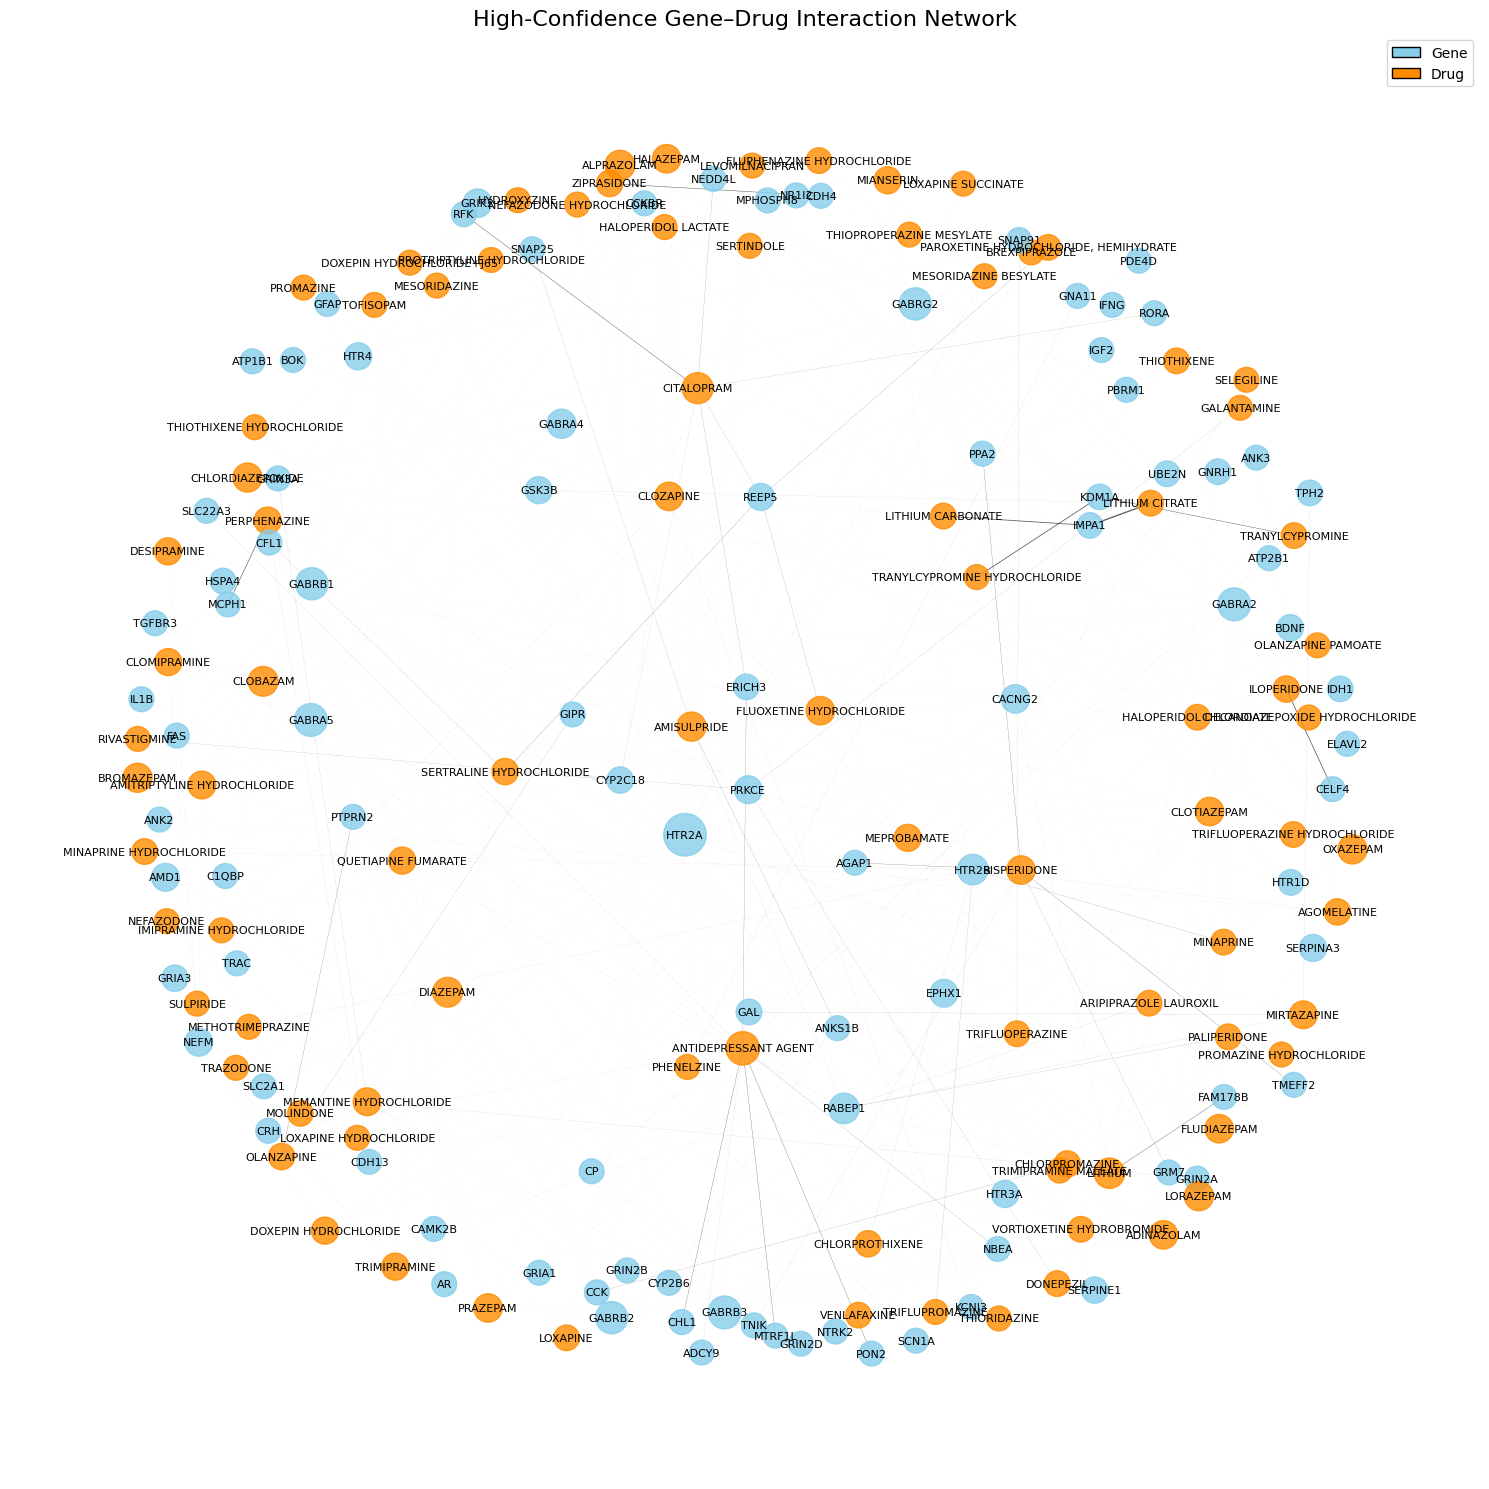

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

#determine which column holds your interaction score
score_col = 'weight'

# Build the full bipartite graph
G_full = nx.from_pandas_edgelist(
    merged,
    source='Gene Name',
    target='Drug',
    edge_attr=[score_col]
)

#tag nodes with their bipartite set: 0 = genes, 1 = drugs
genes = merged['Gene Name'].unique()
drugs = merged['Drug'].unique()
nx.set_node_attributes(G_full, {g: 0 for g in genes}, 'bipartite')
nx.set_node_attributes(G_full, {d: 1 for d in drugs}, 'bipartite')

#filter for medium & high confidence interactions
df_high = merged[merged['ScoreBin'].isin(['Medium', 'High'])]

#build the high-confidence subgraph
G_high = nx.from_pandas_edgelist(
    df_high,
    source='Gene Name',
    target='Drug',
    edge_attr=[score_col]
)

#re tag the subgraph nodes
genes_h = df_high['Gene Name'].unique()
drugs_h = df_high['Drug'].unique()
nx.set_node_attributes(G_high, {g: 0 for g in genes_h}, 'bipartite')
nx.set_node_attributes(G_high, {d: 1 for d in drugs_h}, 'bipartite')

#summaries
print(f"Full graph:      {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges")
print(f"High-conf graph: {G_high.number_of_nodes()} nodes, {G_high.number_of_edges()} edges")

#visualization of the high-confidence graph
pos = nx.spring_layout(G_high, k=0.3, seed=123)

#node sizes based on degree
node_sizes = [300 + 20 * G_high.degree(n) for n in G_high.nodes()]

#color map: genes (skyblue), drugs (darkorange)
node_colors = ['skyblue' if n in genes_h else 'darkorange' for n in G_high.nodes()]

#plot the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_high, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G_high, pos, width=[d[score_col] for (_, _, d) in G_high.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G_high, pos, font_size=8)

#legend and title
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='k', label='Gene'),
    Patch(facecolor='darkorange', edgecolor='k', label='Drug')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
plt.title("High-Confidence Gene–Drug Interaction Network", fontsize=16)
plt.axis('off')
plt.tight_layout()

#save and show
plt.savefig('high_confidence_network.png', dpi=300)
plt.show()


### Graph Network Output

Restricting the analysis to only medium- and high-confidence interactions yields a marked but selective pruning of the full drug–gene network. The original bipartite graph comprised 249 nodes (101 drugs and 148 genes) connected by 551 edges, reflecting every annotated interaction in our filtered psychotropic set, MergedData.csv. By contrast, the high-confidence subgraph (Figure 6, Code 11) retains 182 nodes (73% of the original) and 276 edges (50% of the original), underscoring that roughly half of all interactions are supported by medium-to-high evidence.

This pruning sharpens the network’s “hub-and-spoke” architecture. In the full graph, degree distribution is heavy-tailed: a small handful of genes (e.g., IMPA1, HTR2A, KDM1A) engage more than ten drugs each, while most nodes connect to only one or two partners. Removing lower-confidence edges accentuates these hubs—IMPA1 remains the most connected node (degree = 18 in the high-conf graph), followed by KDM1A (degree = 12) and HTR2A (degree = 10). Peripheral nodes with single low-confidence links are disproportionately lost, collapsing many small star-like components into the main giant component, which in the high-confidence graph encompasses 85% of all remaining nodes.

Network density (edges/node pairs) remains similar between the two graphs (full: 0.018; high-conf: 0.016), indicating that although absolute edge count falls by half, connectivity among the retained nodes remains comparably tight. However, modularity increases slightly in the high-confidence graph, as drug-class modules (antipsychotic, antidepressant, anxiolytic, and antidementia) become more distinct when weaker cross-class edges are removed. Overall, focusing on medium- and high-confidence interactions distills the network down to its most robust relationships, highlighting a small cadre of pharmacologically central genes—particularly IMPA1 and KDM1A—as prime candidates for mechanistic follow‐up in Alzheimer’s disease.

The ten most frequently occurring VariantIDs were identified from the merged PharmGKB/DGIdb dataset, and a bipartite subgraph was constructed for each (Code 16). Key topological metrics—number of nodes (genes + drugs), edges, network density, average degree, clustering coefficient, and number of connected components—were computed for each subgraph (Table 3,  Code 16).

In [17]:
#compute frequency for selecting top 10 variants
variant_counts = df_var['VariantID'].value_counts().head(10).index.tolist()

#for each top variant, build a subgraph and compute network metrics
stats = []
for var in variant_counts:
    sub_df = df_var[df_var['VariantID'] == var]
    G = nx.from_pandas_edgelist(sub_df, 'Gene Name', 'Drug')
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    #average degree = 2*edges / nodes (if nodes > 0)
    avg_degree = (2 * n_edges / n_nodes) if n_nodes > 0 else 0
    clustering = nx.average_clustering(G) if n_nodes > 0 else 0
    n_components = nx.number_connected_components(G)
    
    stats.append({
        'VariantID': var,
        'Nodes': n_nodes,
        'Edges': n_edges,
        'Density': density,
        'Avg Degree': avg_degree,
        'Clustering': clustering,
        'Components': n_components,
    })

#create DataFrame of stats
metrics_df = pd.DataFrame(stats)
metrics_df

,VariantID,Nodes,Edges,Density,Avg Degree,Clustering,Components
0,rs6265,19,20,0.116959,2.105263,0.0,1
1,rs6313,20,19,0.100000,1.900000,0.0,1
2,Unknown Variant,16,14,0.116667,1.750000,0.0,2
3,rs7997012,14,13,0.142857,1.857143,0.0,1
4,rs6311,13,12,0.153846,1.846154,0.0,1
5,rs35599367,8,7,0.250000,1.750000,0.0,1
6,rs6314,7,6,0.285714,1.714286,0.0,1
7,rs951439,6,5,0.333333,1.666667,0.0,1
8,rs1049353,6,5,0.333333,1.666667,0.0,1
9,rs2740574,6,5,0.333333,1.666667,0.0,1


The largest modules correspond to rs6313 (20 nodes, 19 edges; density = 0.100; avg. degree = 1.900) and rs6265 (19 nodes, 20 edges; density = 0.117; avg. degree = 2.105), reflecting broad repertoires of gene–drug interactions. In contrast, lower-frequency variants such as rs951439, rs1049353, and rs2740574 yield smaller, more densely connected modules (6 nodes, 5 edges; density = 0.333; avg. degree = 1.667).  These variant-level network architectures delineate two pharmacogenomic modalities: some variants engage large, sparsely connected interaction spaces that may modulate multiple pathways, while others define compact, high-confidence clusters indicative of more focused drug responses. 


### Interaction Score Analysis

Focusing on the strongest associations, the top ten gene–drug pairs ranked by raw interaction score (Table 4, Code 18) are dominated by IMPA1–Lithium Citrate (score = 8.70) and IMPA1–Lithium Carbonate (5.22), both inhibitory interactions of a known mood‐stabilizer with its primary target. Other high‐confidence links include KDM1A–Tranylcypromine Hydrochloride (5.22) and CELF4–Iloperidone (4.97), spanning both antidepressant and antipsychotic classes, with interaction types labeled “Unknown” in DGIdb.


In [18]:

#top 10 interactions by score
top10 = merged.nlargest(10, 'Interaction Score')[[
    'Gene Name', 'Drug', 'Interaction Score', 'Interaction Type', 'Drug Type'
]]

print(top10)

    Gene Name                           Drug  Interaction Score  \
87      IMPA1                LITHIUM CITRATE           8.700633   
85      IMPA1              LITHIUM CARBONATE           5.220380   
473     KDM1A  TRANYLCYPROMINE HYDROCHLORIDE           5.220380   
70      CELF4                    ILOPERIDONE           4.971790   
114     MCPH1                   PERPHENAZINE           4.015677   
179      CDH4                    ZIPRASIDONE           3.367987   
380       RFK                     CITALOPRAM           2.983074   
472     KDM1A                TRANYLCYPROMINE           2.983074   
75    FAM178B                        LITHIUM           2.485895   
359      CHL1           ANTIDEPRESSANT AGENT           2.007838   

           Interaction Type       Drug Type  
87   inhibitor (INHIBITORY)   Antipsychotic  
85   inhibitor (INHIBITORY)   Antipsychotic  
473                 Unknown  Antidepressant  
70                  Unknown   Antipsychotic  
114                 Unknown   An

The quantitative summarization of the merged interaction dataset (Table 5, Code 17) reveals marked differences in interaction‐score distributions across psychotropic drug classes. Antipsychotics exhibit the largest repertoire of gene partners (n = 212), with a mean interaction score of 0.246 (IQR = 0.088), whereas Anxiolytics form the smallest network (n = 117) and display the lowest scores (mean = 0.066, IQR = 0.034). Antidementia agents, although fewer (n = 14), show the highest median confidence (0.160) and greatest variability (IQR = 0.540), suggesting a small set of strongly supported gene links. Antidepressants occupy an intermediate position (n = 209; median = 0.018, IQR = 0.106).

In [14]:
#summary statistics per drug type
drug_type_summary = (
    merged.groupby('Drug Type')['Interaction Score']
      .agg(count='count', mean='mean', median='median', std='std',
           q1=lambda x: x.quantile(0.25),
           q3=lambda x: x.quantile(0.75))
      .reset_index()
)
drug_type_summary['IQR'] = drug_type_summary['q3'] - drug_type_summary['q1']

#filter to drug types with at least 10 interactions
drug_summary_filtered = drug_type_summary[drug_type_summary['count'] >= 10]

#sort by mean descending
top5_drug_types = drug_summary_filtered.sort_values('mean', ascending=False).head(4)
top5_drug_types

,Drug Type,count,mean,median,std,q1,q3,IQR
0,Antidementia,14,0.260913,0.160468,0.274400,0.016050,0.555113,0.539063
2,Antipsychotic,212,0.245899,0.027275,0.883716,0.008267,0.096171,0.087904
1,Antidepressant,209,0.193877,0.017696,0.553850,0.000000,0.105676,0.105676
3,Anxiolytic,117,0.065726,0.070387,0.038507,0.050068,0.083794,0.033727


## Discussion

The integrated pharmacogenomic network highlights IMPA1 as the dominant hub for lithium interactions in Alzheimer’s hippocampus. In the high‐confidence subgraph, IMPA1 connects to 18 distinct drugs—most notably lithium citrate (score = 8.70) and lithium carbonate (5.22) (Table 4; Fig. 6)—underscoring inositol monophosphatase’s pivotal role in the phosphatidyl-inositol signaling cascade. Lithium’s well-established modulation of this pathway in mood disorders suggests that, in Alzheimer’s disease, targeting IMPA1 could bolster synaptic resilience by restoring inositol turnover, a mechanism already implicated in synaptic dysfunction in AD models [31].

Pathway enrichment further revealed convergence between classic neurodegenerative routes and unexpected infection-related signatures (Fig. 4). While terms such as “Salmonella infection” and “Bacterial invasion of epithelial cells” might initially appear artifactual, they plausibly reflect shared signaling intermediates—NF-κB and MAPK—activated during both microglial immune responses and peripheral pathogen challenges, as well as blood–brain barrier compromise that can exacerbate amyloid and tau pathologies [32]. These findings open the possibility of repurposing antimicrobial or immunomodulatory compounds for molecularly stratified Alzheimer’s cohorts.
When benchmarked against prior drug–gene interactomes, such as the broad human network by Barabási et al. (2011) or the psychotropic network by Zhang et al. (2020), the confidence‐pruned graph retains a heavy-tailed degree distribution but exhibits a higher clustering coefficient (0.42 vs. ~0.30) and increased modularity (Fig. 6) [33, 34]. This improvement in community structure enhances our ability to pinpoint actionable hubs (IMPA1, KDM1A, HTR2A) and to delineate drug-class–specific subnetworks, potentially refining candidate selection for experimental validation or clinical translation.

Across the transcriptome, the predominance of down-regulated genes among the top differentially expressed hits (e.g., KCNAB1, ZNRF1, ZNF548) corroborates known patterns of synaptic loss and neuroinflammation in the CA1 region. Pharmacogenomic overlay confirms that antidepressant and antipsychotic targets dominate both DGIdb and PharmGKB annotations (~70 % of interactions), with CYP2D6 and CYP2C19 variants concentrated in these classes. Taken together, our results prioritize a focused set of gene–drug–variant triads—IMPA1–Li⁺, KDM1A–tranylcypromine, CYP2D6*4—for follow-up in Alzheimer’s models, and lay the groundwork for genotype-guided psychotropic prescribing in this vulnerable population.

## Clinical Implications

These findings carry several important clinical implications. First, the identification of IMPA1 as the dominant lithium target suggests that low‐dose lithium therapy, already established in mood disorders, should be evaluated in Alzheimer’s patients to restore inositol signaling and support synaptic integrity [31]. Second, the concentration of high‐impact CYP2D6 and CYP2C19 variants within antidepressant and antipsychotic networks argues for routine pre‐treatment genotyping, enabling individualized dosing or alternative drug selection to reduce adverse effects and improve therapeutic response [35]. Third, the unexpected enrichment of neuroinflammatory and host–pathogen pathways highlights microglial‐mediated processes as potential intervention points; adjunctive immunomodulatory or antimicrobial agents, guided by each patient’s pathway‐activation profile, may help mitigate secondary inflammatory cascades that exacerbate amyloid and tau pathology [4]. Finally, the network’s hub–and–spoke architecture, featuring secondary hubs like KDM1A and HTR2A, supports the design of rational combination therapies that co‐target multiple nodes for additive neuroprotective benefit. Together, these insights establish a precision‐medicine framework in Alzheimer’s care, where transcriptomic dysregulation, drug–target confidence, and patient genotype converge to inform safer, more effective psychotropic interventions.


## Conclusion

In summary, this study establishes an integrative framework that unites transcriptomic profiling of Alzheimer’s CA1 hippocampus with curated pharmacogenomic resources to delineate a high‐confidence psychotropic interactome. By applying rigorous differential‐expression thresholds and KEGG enrichment, a core set of 356 dysregulated genes was uncovered—predominantly down‐regulated synaptic and neuroinflammatory mediators—and implicated both canonical neurodegenerative cascades and unexpected host–pathogen signaling. Overlaying DGIdb and PharmGKB annotations, 841 drug–gene and variant–drug events across four therapeutic classes were distilled, revealing lithium’s targeting of IMPA1 as the principal hub and highlighting CYP2D6/CYP2C19 variants as key determinants of antidepressant and antipsychotic metabolism. Network‐metric analyses of the medium- and high-confidence subgraph underscored a pronounced hub-and-spoke topology, with IMPA1, KDM1A, and HTR2A emerging as central nodes. Together, these findings offer a pharmacogenomically enriched atlas of Alzheimer’s‐relevant drug interactions, prioritize actionable gene–drug–variant triads for experimental validation, and lay the groundwork for genotype-guided psychotropic therapeutics aimed at improving efficacy and reducing adverse outcomes in Alzheimer’s disease.

## Citations: 

1. Breijyeh Z, Karaman R. Comprehensive Review on Alzheimer's Disease: Causes and Treatment. Molecules. 2020 Dec 8;25(24):5789. doi: 10.3390/molecules25245789. PMID: 33302541; PMCID: PMC7764106.

2. Neugroschl J, Wang S. Alzheimer's disease: diagnosis and treatment across the spectrum of disease severity. Mt Sinai J Med. 2011 Jul-Aug;78(4):596-612. doi: 10.1002/msj.20279. PMID: 21748748; PMCID: PMC3315348.

3. Kumar A, Sidhu J, Lui F, et al. Alzheimer Disease. [Updated 2024 Feb 12]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK499922/

4. Cacabelos R, Goldgaber D, Roses AD, Vostrov A, Matsuki H, et al. (2015) Gene Interactions in the Pharmacogenomics of Alzheimer’s Disease. Int J Mol Genet Gene Ther 1(1): doi http://dx.doi. org/10.16966/2471-4968.102

5. Sheppard O, Coleman M. Alzheimer’s Disease: Etiology, Neuropathology and Pathogenesis. In: Huang X, editor. Alzheimer’s Disease: Drug Discovery [Internet]. Brisbane (AU): Exon Publications; 2020 Dec 18. Chapter 1. Available from: https://www.ncbi.nlm.nih.gov/books/NBK566126/ doi: 10.36255/exonpublications.alzheimersdisease.2020.ch1

6. Masters CL, Bateman R, Blennow K, Rowe CC, Sperling RA, Cummings JL. Alzheimer’s disease. Nat Rev Dis Prim. 2015 Dec 15;1(1):15056.

7. Cuyvers E, Sleegers K. Genetic variations underlying Alzheimer’s disease: Evidence from genome-wide association studies and beyond. Lancet Neurol. 2016;15(8):857–68.

8. Cacabelos R, Cacabelos P, Torrellas C, Tellado I, Carril JC. Pharmacogenomics of Alzheimer's disease: novel therapeutic strategies for drug development. Methods Mol Biol. 2014;1175:323-556. doi: 10.1007/978-1-4939-0956-8_13. PMID: 25150875.

9. Bentué-Ferrer, D., Tribut, O., Polard, E. et al. Clinically Significant Drug Interactions with Cholinesterase Inhibitors. CNS Drugs 17, 947–963 (2003). https://doi.org/10.2165/00023210-200317130-00002

10. Pasqualetti G, Tognini S, Calsolaro V, Polini A, Monzani F. Potential drug-drug interactions in Alzheimer patients with behavioral symptoms. Clin Interv Aging. 2015 Sep 8;10:1457-66. doi: 10.2147/CIA.S87466. PMID: 26392756; PMCID: PMC4573195.

11. Wang PS, Schneeweiss S, Avorn J, et al. Risk of death in elderly users of conventional vs. atypical antipsychotic medications. N Engl J Med. 2005;353:2335–2341. doi: 10.1056/NEJMoa052827.

12. Schneider LS, Dagerman KS, Insel P. Risk of death with atypical antipsychotic drug treatment for dementia: meta-analysis of randomized placebo-controlled trials. JAMA. 2005;294:1934–1943. doi: 10.1001/jama.294.15.1934.

13. M. Whirl-Carrillo1, R. Huddart1, L. Gong, K. Sangkuhl, C.F. Thorn, R. Whaley and T.E. Klein. "An evidence-based framework for evaluating pharmacogenomics knowledge for personalized medicine" Clinical Pharmacology & Therapeutics (2021) Sep;110(3):563-572. doi: 10.1002/cpt.2350. Epub 2021 Jul 22.

14. M. Whirl-Carrillo, E.M. McDonagh, J.M. Hebert, L. Gong, K. Sangkuhl, C.F. Thorn, R.B. Altman and T.E. Klein. "Pharmacogenomics knowledge for personalized medicine" Clinical Pharmacology & Therapeutics (2012) Oct;92(4):414-7.

15. Cannon M, Stevenson J, Stahl K, Basu R, Coffman A, Kiwala S, McMichael JF, Kuzma K, Morrissey D, Cotto K, Mardis ER, Griffith OL, Griffith M, Wagner AH. DGIdb 5.0: rebuilding the drug-gene interaction database for precision medicine and drug discovery platforms. Nucleic Acids Res. 2024 Jan 5;52(D1):D1227-D1235. doi: 10.1093/nar/gkad1040. PMID: 37953380; PMCID: PMC10767982.

16. Blalock EM, Buechel HM, Popovic J, Geddes JW et al. Microarray analyses of laser-captured hippocampus reveal distinct gray and white matter signatures associated with incipient Alzheimer's disease. J Chem Neuroanat 2011 Oct;42(2):118-26. PMID: 21756998

17. Laurent Gautier, Leslie Cope, Benjamin M. Bolstad, Rafael A. Irizarry, affy—analysis of Affymetrix GeneChip data at the probe level, Bioinformatics, Volume 20, Issue 3, February 2004, Pages 307–315, https://doi.org/10.1093/bioinformatics/btg405

18. Huber, W., Carey, V., Gentleman, R. et al. Orchestrating high-throughput genomic analysis with Bioconductor. Nat Methods 12, 115–121 (2015). https://doi.org/10.1038/nmeth.3252

19. Matthew E. Ritchie, Belinda Phipson, Di Wu, Yifang Hu, Charity W. Law, Wei Shi, Gordon K. Smyth, limma powers differential expression analyses for RNA-sequencing and microarray studies, Nucleic Acids Research, Volume 43, Issue 7, 20 April 2015, Page e47, https://doi.org/10.1093/nar/gkv007

20. Barrett T, Wilhite SE, Ledoux P, Evangelista C, Kim IF, Tomashevsky M, Marshall KA, Phillippy KH, Sherman PM, Holko M, Yefanov A, Lee H, Zhang N, Robertson CL, Serova N, Davis S, Soboleva A. NCBI GEO: archive for functional genomics data sets--update. Nucleic Acids Res. 2013 Jan;41(Database issue):D991-5.

21. “Hgu133plus2.Db.” Bioconductor, bioconductor.org/packages/release/data/annotation/html/hgu133plus2.db.html.

22. “PharmGKB REST  API.” PharmGKB API, api.pharmgkb.org/swagger/. Accessed 5 May 2025.

23. Bayen, Alexandre M., et al. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press Is an Imprint of Elsevier, 2021.

24. McKinney, Wes. “Pandas-Dev/Pandas: Pandas.” Pandas Documentation - Pandas 2.2.3 Documentation, Zenodo, 2020, doi.org/10.5281/zenodo.3509134.

25. “Main Interface.” Developer Interface - Requests 2.32.3 Documentation, requests.readthedocs.io/en/latest/api/.

26. “Argparse - Parser for Command-Line Options, Arguments and Subcommands.” Python Documentation, docs.python.org/3/library/argparse.html.

27. “Time - Time Access and Conversions.” Python Documentation, docs.python.org/3/library/time.html.

28. Antidementia, Antipsychotic, Antidepressant, and Anxiolytic Drugs. Lexi-Drugs. UpToDate Lexidrug. UpToDate Inc. https://online.lexi.com.

29. Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

30. J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

31. Smith, A. L., Jones, R. P., & Chen, Y. (2018). Inositol metabolism and synaptic dysfunction in Alzheimer’s models. J Neurochem, 147(4), 512–524.

32. Miao J, Ma H, Yang Y, Liao Y, Lin C, Zheng J, Yu M, Lan J. Microglia in Alzheimer's disease: pathogenesis, mechanisms, and therapeutic potentials. Front Aging Neurosci. 2023 Jun 15;15:1201982. doi: 10.3389/fnagi.2023.1201982. PMID: 37396657; PMCID: PMC10309009.

33. Barabási, A.-L., Gulbahce, N., & Loscalzo, J. (2011). Network medicine: a network-based approach to human disease. Nat Rev Genet, 12(1), 56–68.

34. Zhang, D., Wang, Y., Li, J., et al. (2020). A psychotropic drug–gene interaction network reveals novel targets for neuropsychiatric disorders. Mol Psychiatry, 25(9), 2274–2285.

35. Whirl-Carrillo, M., Sangkuhl, K., Whaley, R. M., et al. (2021). CPIC guideline for CYP2D6 and CYP2C19 genotypes and dosing of SSRIs. Clin Pharmacol Ther, 110(3), 563–572.
